In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib .pyplot as plt 

Description:


Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

In [2]:
data = pd.read_csv("breast-cancer.csv" )
data 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.columns.unique()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [5]:
data.shape

(569, 32)

In [6]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
100,862717,M,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,...,16.99,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397
240,88350402,B,13.64,15.60,87.38,575.3,0.09423,0.06630,0.047050,0.037310,...,14.85,19.05,94.11,683.4,0.12780,0.12910,0.15330,0.09222,0.2530,0.06510
421,906564,B,14.69,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
308,893526,B,13.50,12.71,85.69,566.2,0.07376,0.03614,0.002758,0.004419,...,14.97,16.94,95.48,698.7,0.09023,0.05836,0.01379,0.02210,0.2267,0.06192
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.000000,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [12]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [13]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
data.columns.value_counts()

id                         1
diagnosis                  1
symmetry_worst             1
concave points_worst       1
concavity_worst            1
compactness_worst          1
smoothness_worst           1
area_worst                 1
perimeter_worst            1
texture_worst              1
radius_worst               1
fractal_dimension_se       1
symmetry_se                1
concave points_se          1
concavity_se               1
compactness_se             1
smoothness_se              1
area_se                    1
perimeter_se               1
texture_se                 1
radius_se                  1
fractal_dimension_mean     1
symmetry_mean              1
concave points_mean        1
concavity_mean             1
compactness_mean           1
smoothness_mean            1
area_mean                  1
perimeter_mean             1
texture_mean               1
radius_mean                1
fractal_dimension_worst    1
Name: count, dtype: int64

In [15]:
data.drop("id" , axis = 1 , inplace = True)

In [16]:
for i in data.columns : 
    Min = data[i].min() 
    Max = data[i].max()
    

    print(i ,':')
    print ('TheMin : ',Min)
    print ('TheMax : ',Max)

    print('-----------------------------')

diagnosis :
TheMin :  B
TheMax :  M
-----------------------------
radius_mean :
TheMin :  6.981
TheMax :  28.11
-----------------------------
texture_mean :
TheMin :  9.71
TheMax :  39.28
-----------------------------
perimeter_mean :
TheMin :  43.79
TheMax :  188.5
-----------------------------
area_mean :
TheMin :  143.5
TheMax :  2501.0
-----------------------------
smoothness_mean :
TheMin :  0.05263
TheMax :  0.1634
-----------------------------
compactness_mean :
TheMin :  0.01938
TheMax :  0.3454
-----------------------------
concavity_mean :
TheMin :  0.0
TheMax :  0.4268
-----------------------------
concave points_mean :
TheMin :  0.0
TheMax :  0.2012
-----------------------------
symmetry_mean :
TheMin :  0.106
TheMax :  0.304
-----------------------------
fractal_dimension_mean :
TheMin :  0.04996
TheMax :  0.09744
-----------------------------
radius_se :
TheMin :  0.1115
TheMax :  2.873
-----------------------------
texture_se :
TheMin :  0.3602
TheMax :  4.885
----------

radius_mean :


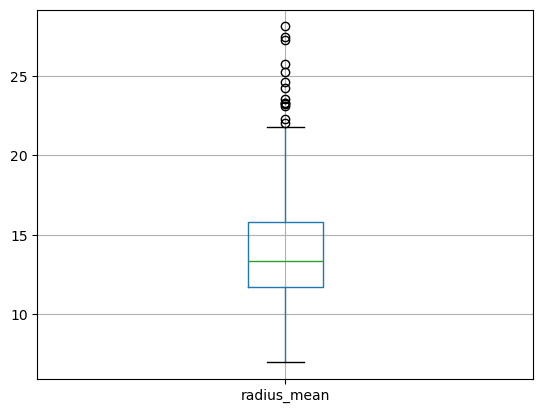

-----------------------------
texture_mean :


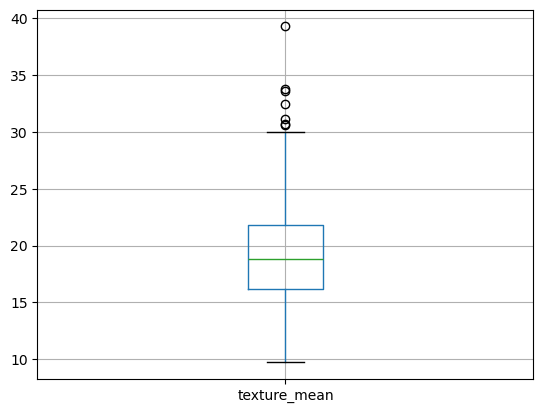

-----------------------------
perimeter_mean :


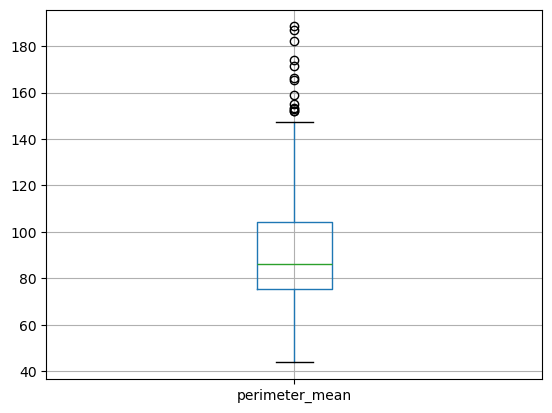

-----------------------------
area_mean :


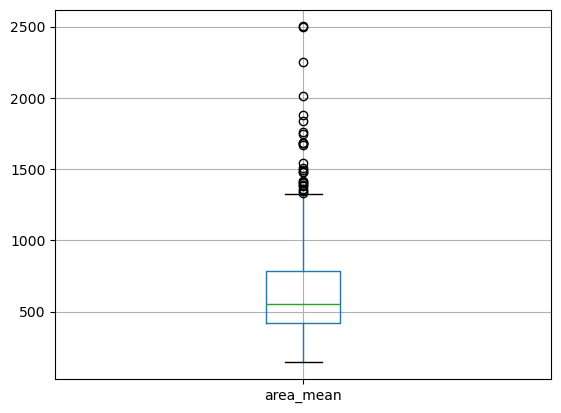

-----------------------------
smoothness_mean :


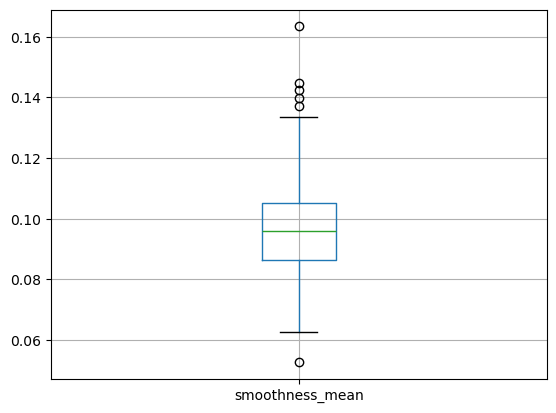

-----------------------------
compactness_mean :


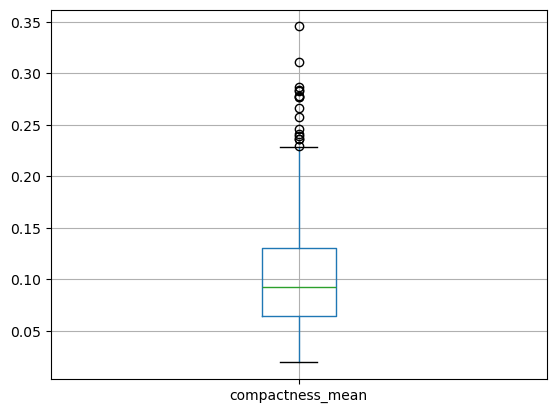

-----------------------------
concavity_mean :


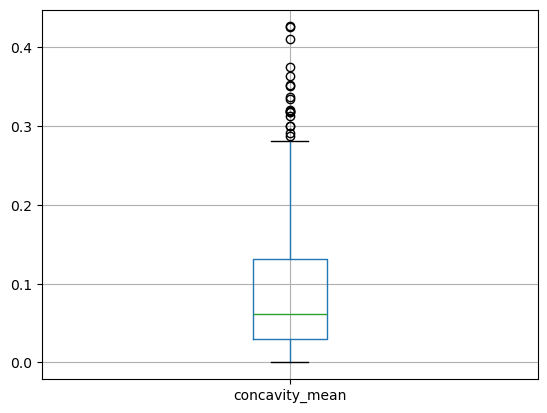

-----------------------------
concave points_mean :


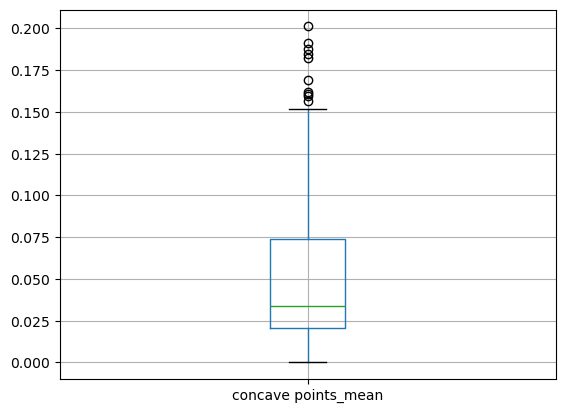

-----------------------------
symmetry_mean :


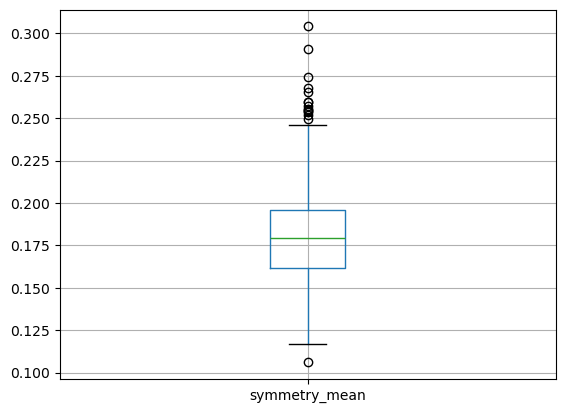

-----------------------------
fractal_dimension_mean :


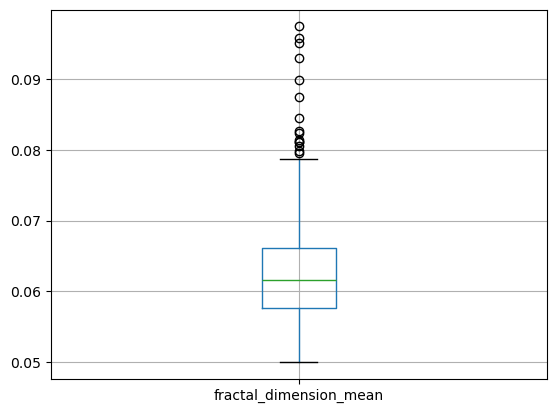

-----------------------------
radius_se :


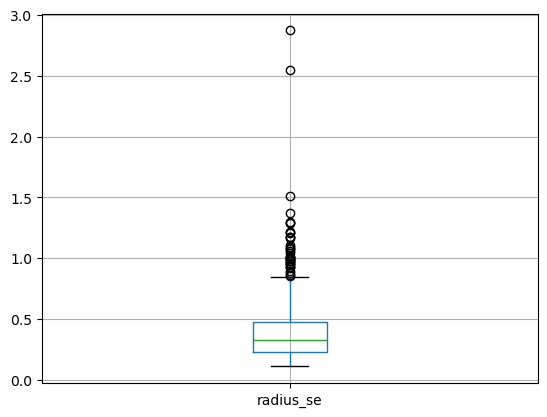

-----------------------------
texture_se :


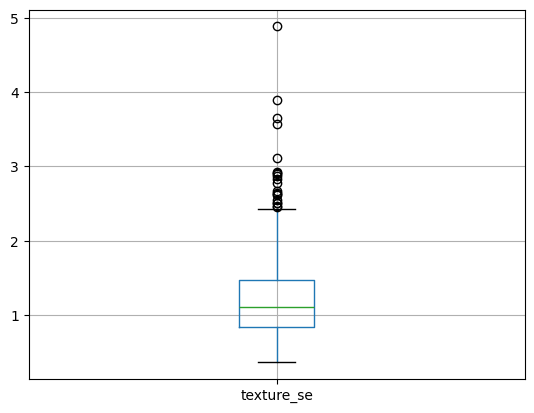

-----------------------------
perimeter_se :


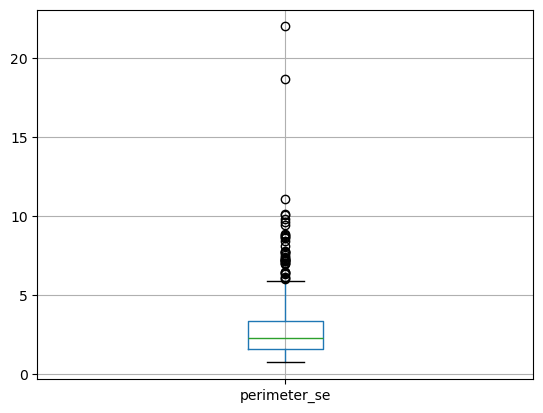

-----------------------------
area_se :


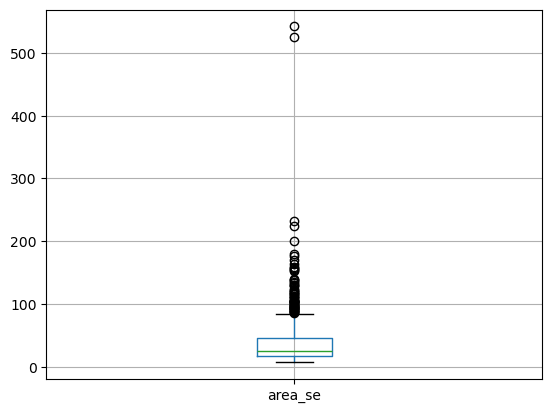

-----------------------------
smoothness_se :


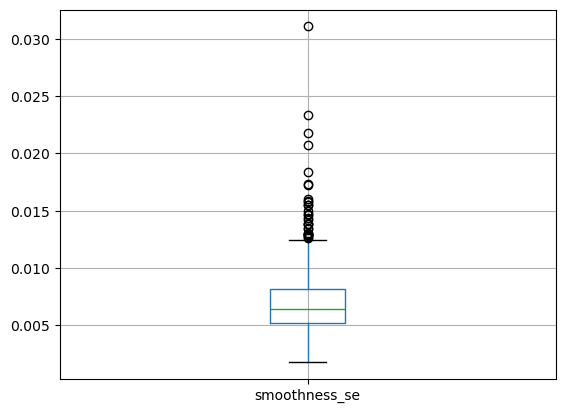

-----------------------------
compactness_se :


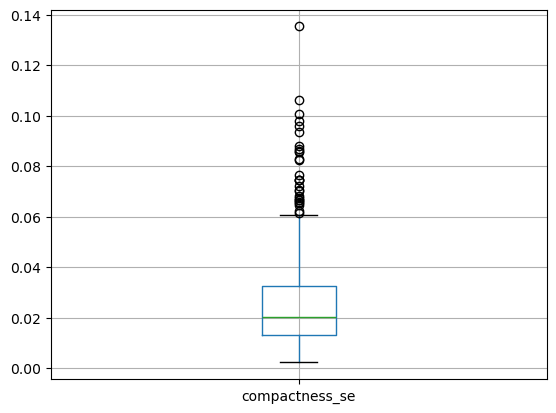

-----------------------------
concavity_se :


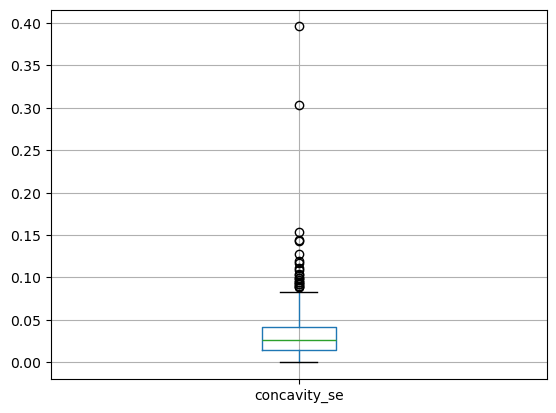

-----------------------------
concave points_se :


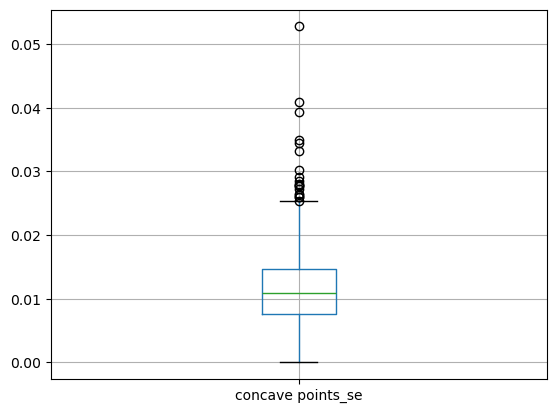

-----------------------------
symmetry_se :


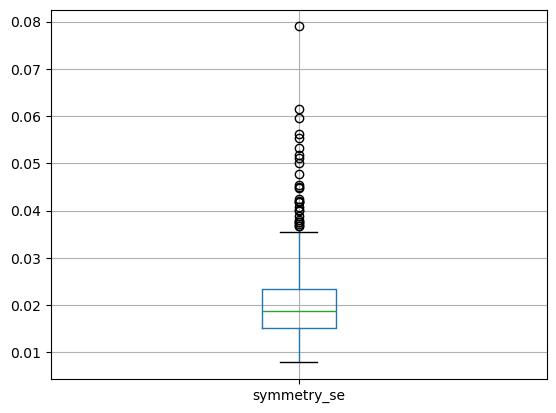

-----------------------------
fractal_dimension_se :


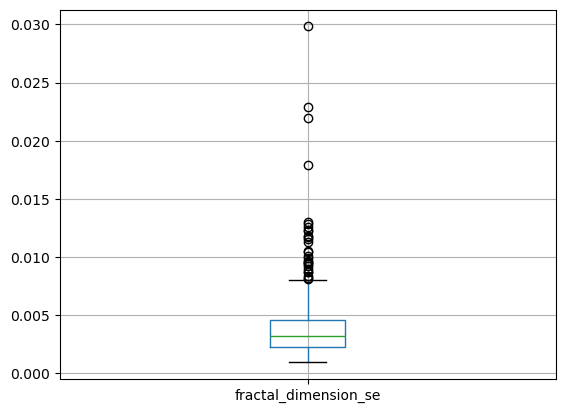

-----------------------------
radius_worst :


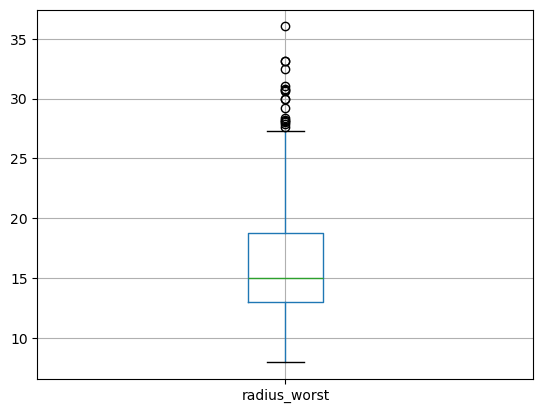

-----------------------------
texture_worst :


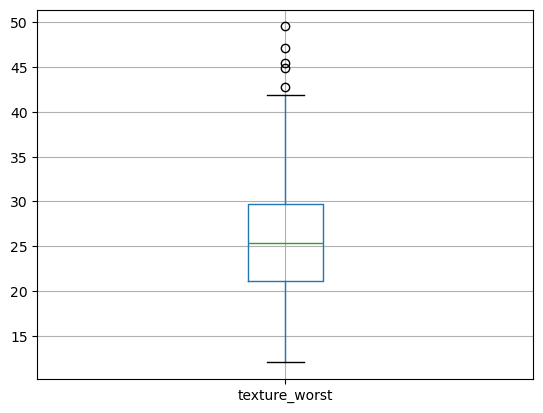

-----------------------------
perimeter_worst :


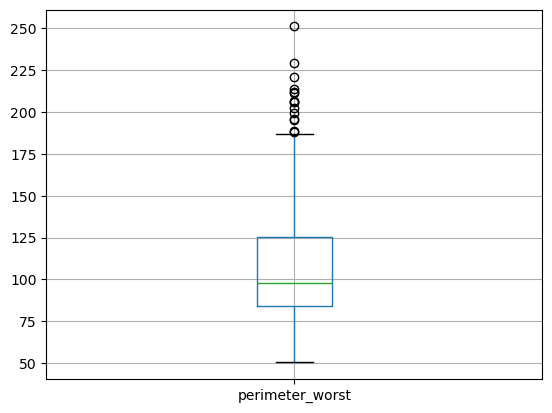

-----------------------------
area_worst :


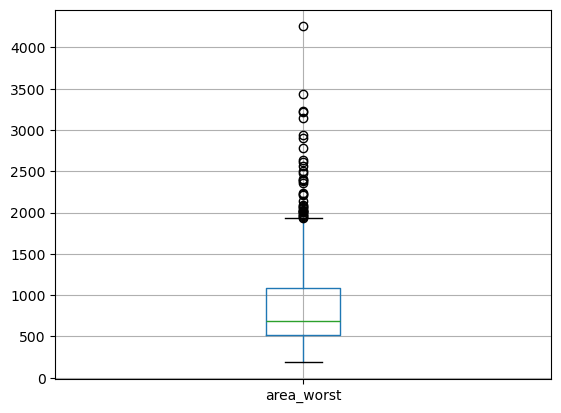

-----------------------------
smoothness_worst :


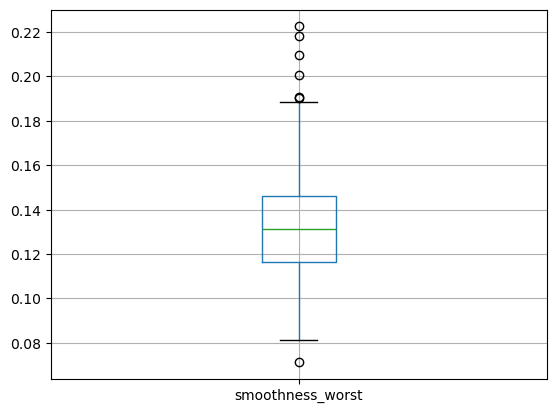

-----------------------------
compactness_worst :


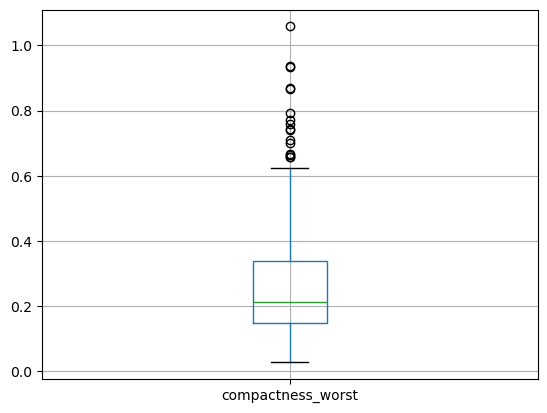

-----------------------------
concavity_worst :


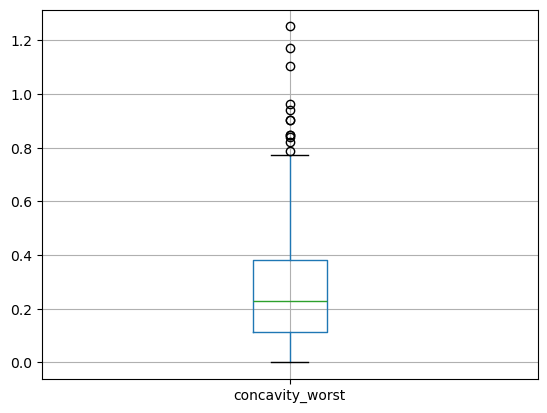

-----------------------------
concave points_worst :


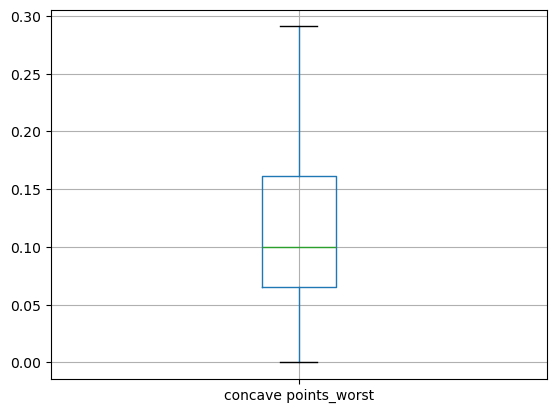

-----------------------------
symmetry_worst :


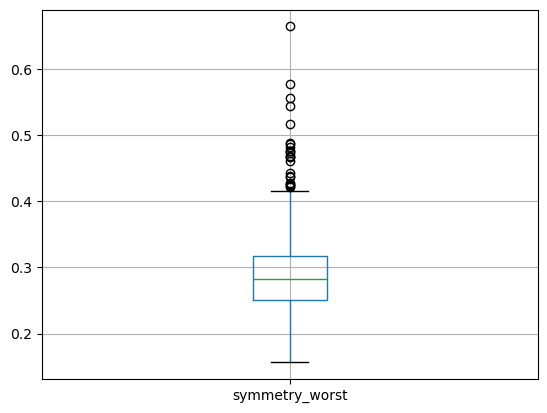

-----------------------------
fractal_dimension_worst :


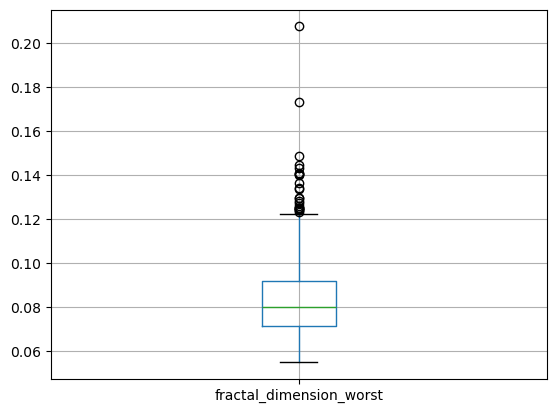

-----------------------------


In [17]:
for i in data.columns[1:] : 
    print(i ,':')
    data.boxplot( i)
    plt.show()
    print('-----------------------------')

In [18]:
data.diagnosis.value_counts().to_frame()

,count
diagnosis,
B,357
M,212


In [143]:
data.diagnosis.value_counts().plot.bar()

<Axes: xlabel='diagnosis'>

In [20]:
data.radius_mean.mean()

14.127291739894552

In [21]:
data.radius_mean.std()

3.524048826212078

In [22]:
data.radius_mean.median()

13.37

In [23]:
data.texture_mean.mean()

19.289648506151142

In [24]:
data.texture_mean.std()

4.301035768166949

In [25]:
data.perimeter_mean.std()

24.2989810387549

In [26]:
data.perimeter_mean.mean()

91.96903339191564

In [27]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
data.area_mean.mean()

654.8891036906855

In [29]:
data.area_mean.std()

351.9141291816527

In [30]:
data.area_mean.median()

551.1

In [31]:
data.smoothness_mean.mean()

0.0963602811950791

In [32]:
data.smoothness_mean.std()

0.014064128137673616

In [33]:
data.compactness_mean.mean()

0.10434098418277679

In [34]:
data.compactness_mean.std()

0.0528127579325122

In [35]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
data.concavity_mean.mean()

0.0887993158172232

In [37]:
data.concavity_mean.std()

0.0797198087078935

In [38]:
data.concavity_mean.median()

0.06154

In [39]:
data["concave points_mean"].mean()

0.04891914586994728

In [40]:
data["concave points_mean"].std()

0.03880284485915359

In [41]:
data["symmetry_mean"].mean()

0.18116186291739894

In [42]:
data.symmetry_mean.std()

0.027414281336035712

In [43]:
data["fractal_dimension_mean"].std()

0.007060362795084459

In [44]:
data["fractal_dimension_mean"].mean()

0.06279760984182776

In [45]:
data.radius_se.mean()

0.40517205623901575

In [46]:
data.radius_se.std()

0.2773127329861041

In [47]:
data.radius_se.median()

0.3242

In [48]:
data.texture_se.mean()

1.2168534270650264

In [49]:
data.texture_se.std()

0.5516483926172023

In [50]:
data.perimeter_se.mean()

2.8660592267135327

In [51]:
data.perimeter_se.std()

2.021854554042107

In [52]:
data.area_se.mean()

40.337079086116

In [53]:
data.area_se.std()

45.49100551613178

In [54]:
data.area_se.median()

24.53

In [55]:
data.smoothness_se.mean()

0.007040978910369069

In [56]:
data.smoothness_se.std()

0.003002517943839067

In [57]:
data.compactness_se.mean()

0.025478138840070295

In [58]:
data.compactness_se.std()

0.017908179325677377

In [59]:
data.concavity_se.mean()

0.03189371634446397

In [60]:
data.concavity_se.std()

0.030186060322988394

In [61]:
data["concave points_se"].mean()

0.011796137082601054

In [62]:
data["concave points_se"].std()

0.006170285174046866

In [63]:
data.symmetry_se.mean()

0.02054229876977153

In [64]:
data.symmetry_se.std()

0.008266371528798399

In [65]:
data.fractal_dimension_se.mean()

0.0037949038664323374

In [66]:
data.fractal_dimension_se.std()

0.0026460709670891942

In [67]:
data.radius_worst.mean()

16.269189806678387

In [68]:
data.radius_worst.std()

4.833241580469324

In [69]:
data.radius_worst.median()

14.97

In [70]:
data.texture_worst.mean()

25.677223198594024

In [71]:
data.texture_worst.std()

6.146257623038323

In [72]:
data.perimeter_worst.mean()

107.26121265377857

In [73]:
data.perimeter_worst.median()

97.66

In [74]:
data.perimeter_worst.std()

33.60254226903635

In [75]:
data.area_worst.std()

569.3569926699492

In [76]:
data.area_worst.mean()

880.5831282952548

In [77]:
data.smoothness_worst.min()

0.07117

In [78]:
data.smoothness_worst.mean()

0.13236859402460457

In [79]:
data.smoothness_worst.median()

0.1313

In [80]:
data.smoothness_worst.std()

0.022832429404835458

In [81]:
data.compactness_worst.mean()

0.25426504393673116

In [82]:
data.concavity_worst.mean()

0.27218848330404216

In [83]:
data.concavity_worst.median()

0.2267

In [84]:
data.concavity_worst.std()

0.20862428060813235

In [85]:
data["concave points_worst"].std()

0.0657323411959421

In [86]:
data["concave points_worst"].mean()

0.11460622319859401

In [87]:
data["symmetry_worst"].mean()

0.2900755711775044

In [88]:
data.symmetry_worst.std()

0.06186746753751869

In [89]:
data.fractal_dimension_worst.mean()

0.0839458172231986

In [90]:
data.fractal_dimension_worst.median()

0.08004

In [91]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
data.groupby(["diagnosis","texture_mean"]).texture_mean.mean().sort_values(ascending=True).to_frame()

texture_mean
diagnosis texture_mean              
B         9.71                  9.71
M         10.38                10.38
B         10.72                10.72
          10.82                10.82
          10.89                10.89
...                              ...
M         31.12                31.12
          32.47                32.47
          33.56                33.56
B         33.81                33.81
M         39.28                39.28

[510 rows x 1 columns]

In [93]:
data.groupby("diagnosis").fractal_dimension_mean.value_counts().sort_values(ascending=False).to_frame()

count
diagnosis fractal_dimension_mean       
B         0.05907                     3
          0.05913                     3
          0.06724                     2
          0.06113                     2
          0.06129                     2
...                                 ...
          0.06314                     1
          0.06312                     1
          0.06303                     1
          0.06290                     1
M         0.09744                     1

[531 rows x 1 columns]

In [94]:
data.groupby("diagnosis").perimeter_worst.mean().to_frame()

,perimeter_worst
diagnosis,
B,87.005938
M,141.370330


In [95]:
data.groupby(["radius_se","texture_se"]).perimeter_se.sum().to_frame()

,,perimeter_se
radius_se,texture_se,
0.1115,1.2310,2.3630
0.1144,1.0230,0.9887
0.1153,0.6745,0.7570
0.1166,0.4957,0.7714
0.1186,1.1820,1.1740
...,...,...
1.2960,1.4520,8.4190
1.3700,1.2130,9.4240
1.5090,3.1200,9.8070


In [96]:
data.groupby("diagnosis")["concave points_mean"].mean().sort_values(ascending=False).to_frame()

,concave points_mean
diagnosis,
M,0.087990
B,0.025717


In [97]:
data.groupby(["diagnosis","concave points_worst"]).compactness_worst.value_counts().to_frame()

count
diagnosis concave points_worst compactness_worst       
B         0.0000               0.02729                1
                               0.05213                1
                               0.05494                1
                               0.06444                1
                               0.06791                1
...                                                 ...
M         0.2733               0.41670                1
          0.2756               0.59370                1
          0.2867               0.60760                1
          0.2903               0.75840                1
          0.2910               0.69970                1

[569 rows x 1 columns]

In [98]:
data.groupby(["diagnosis","fractal_dimension_worst"]).fractal_dimension_se.mean().to_frame()

fractal_dimension_se
diagnosis fractal_dimension_worst                      
B         0.05521                              0.001058
          0.05695                              0.000895
          0.05843                              0.000968
          0.05871                              0.001309
          0.05905                              0.001773
...                                                 ...
M         0.14090                              0.006142
          0.14310                              0.008093
          0.14460                              0.011720
          0.17300                              0.009208
          0.20750                              0.010080

[552 rows x 1 columns]

In [99]:
data.groupby(["diagnosis","concavity_mean","concavity_se"]).concavity_worst.value_counts().to_frame()

count
diagnosis concavity_mean concavity_se concavity_worst       
B         0.000000       0.000000     0.000000            13
          0.000692       0.000692     0.001845             1
          0.000974       0.000974     0.005518             1
          0.001194       0.000793     0.003581             1
          0.001461       0.001128     0.011200             1
...                                                      ...
M         0.352300       0.089580     0.789200             1
          0.363500       0.080550     0.683300             1
          0.375400       0.109100     0.768100             1
          0.426400       0.104000     0.960800             1
          0.426800       0.127800     0.580300             1

[557 rows x 1 columns]

In [100]:
data.groupby(["diagnosis","texture_mean","texture_se"]).texture_worst.value_counts().to_frame()

count
diagnosis texture_mean texture_se texture_worst       
B         9.71         0.4064     12.02              1
          10.72        0.3602     12.87              1
          10.82        0.4607     15.97              1
          10.89        0.8570     15.98              1
          10.91        1.0450     20.14              1
...                                                ...
M         30.62        1.2050     42.79              1
          31.12        1.6170     47.16              1
          32.47        1.3210     45.41              1
          33.56        1.2780     49.54              1
          39.28        0.8561     44.87              1

[569 rows x 1 columns]

In [101]:
data.groupby(["diagnosis","compactness_mean",'compactness_se']).compactness_worst.value_counts().sort_values(ascending=True).to_frame()

count
diagnosis compactness_mean compactness_se compactness_worst       
B         0.01938          0.002252       0.03432                1
M         0.09182          0.024700       0.21190                1
          0.08995          0.012060       0.25670                1
          0.08799          0.022630       0.35470                1
          0.08642          0.052960       0.19630                1
...                                                            ...
B         0.07694          0.026520       0.17890                1
          0.07698          0.013820       0.17110                1
                           0.028990       0.12480                1
          0.07632          0.017620       0.22350                1
M         0.34540          0.068350       0.61640                1

[569 rows x 1 columns]

In [102]:
data.groupby(["diagnosis","symmetry_mean","symmetry_se"]).symmetry_worst.value_counts().to_frame()

count
diagnosis symmetry_mean symmetry_se symmetry_worst       
B         0.1060        0.01989     0.1566              1
          0.1167        0.02165     0.1811              1
          0.1203        0.02470     0.2191              1
          0.1215        0.01393     0.1917              1
          0.1220        0.01302     0.1783              1
...                                                   ...
M         0.2597        0.05963     0.6638              1
          0.2655        0.04547     0.3222              1
          0.2678        0.05628     0.5774              1
          0.2906        0.07895     0.5440              1
          0.3040        0.02308     0.4066              1

[569 rows x 1 columns]

In [103]:
data.groupby(["diagnosis","area_mean","area_se"]).area_worst.value_counts().to_frame()

count
diagnosis area_mean area_se area_worst       
B         143.5     9.833   185.2           1
          170.4     11.730  223.6           1
          178.8     19.140  248.0           1
          181.0     19.150  268.6           1
          201.9     8.205   242.2           1
...                                       ...
M         1878.0    120.000 2562.0          1
          2010.0    153.100 3234.0          1
          2250.0    128.700 3216.0          1
          2499.0    525.600 2499.0          1
          2501.0    542.200 4254.0          1

[569 rows x 1 columns]

In [104]:
data.groupby(["diagnosis","smoothness_mean","smoothness_se"]).smoothness_worst.value_counts().to_frame()

count
diagnosis smoothness_mean smoothness_se smoothness_worst       
B         0.05263         0.007189      0.08996               1
          0.06251         0.003418      0.08125               1
          0.06429         0.003492      0.08567               1
          0.06576         0.003169      0.09445               1
          0.06613         0.006854      0.09457               1
...                                                         ...
M         0.13260         0.006515      0.17010               1
          0.13350         0.010150      0.17650               1
          0.13980         0.007162      0.18620               1
          0.14250         0.009110      0.20980               1
          0.14470         0.023330      0.16960               1

[569 rows x 1 columns]

In [105]:
# encoding 
encoding =pd.get_dummies(data.diagnosis).astype(int)
encoding

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [106]:
from sklearn .preprocessing import LabelEncoder 

In [107]:
encoder = LabelEncoder()
data["diagnosis"] = encoder.fit_transform(data['diagnosis'])

In [108]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [110]:
from sklearn.model_selection import train_test_split 

In [111]:
x = data.drop("diagnosis" , axis = 1)
y = data.diagnosis

In [112]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [113]:
y 

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [114]:
xtrain , xtest , ytrain  , ytest = train_test_split(x,y, train_size=0.8) 

In [115]:
from sklearn.linear_model import LogisticRegression 

In [116]:
model  = LogisticRegression(max_iter=3000)

In [117]:
import warnings 
warnings.filterwarnings("ignore")
model.fit(xtrain , ytrain)

LogisticRegression(max_iter=3000)

In [118]:
model.predict(xtest)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

In [119]:
model.score(xtrain,ytrain)

0.9582417582417583

In [120]:
model.score(xtest,ytest)

0.9736842105263158

In [121]:
from sklearn .metrics import classification_report 

In [122]:
actual_value = ytest.values 
actual_value

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

In [123]:
predictions = model.predict(xtest)
predictions

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0])

In [124]:
print(classification_report(actual_value,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        79
           1       0.94      0.97      0.96        35

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [125]:
from sklearn.metrics import confusion_matrix 

In [126]:
camtrix = confusion_matrix(actual_value, predictions)
camtrix

array([[77,  2],
       [ 1, 34]], dtype=int64)

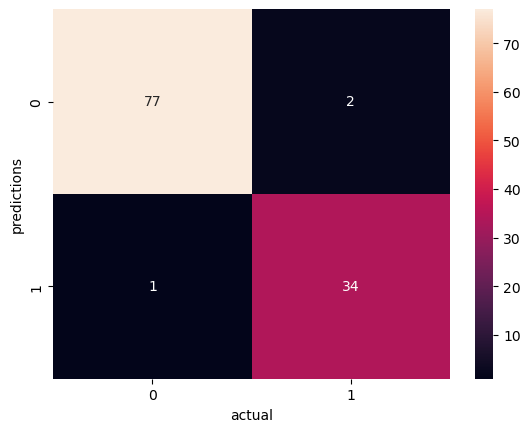

In [135]:
sns.heatmap(camtrix , annot=True)
plt.xlabel("actual")
plt.ylabel("predictions") 
plt.show()

In [128]:
def misconfusion_matrix(camtrix) : 
    counter  = 0 
    for i in range(len(camtrix)) :
        for j in range(len(camtrix)) :
            if i == j :
                continue
        counter += camtrix[i][j]
        return counter 
       

In [129]:
misconfusion_matrix(camtrix)

2

In [130]:
import pickle

In [131]:
with open ("model_breast-cancer" , "wb") as file : 
    pickle.dump(model , file) 

In [132]:
with open("model_breast-cancer" , "rb") as file : 
    online_model = pickle.load(file)

In [133]:
model.score(xtrain,ytrain)

0.9582417582417583

In [134]:
model.score(xtest,ytest)

0.9736842105263158